## Load Balancing Problem
Following Kleinberg and Tardos

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from itertools import combinations
import matplotlib.patches as patches


## Choose colors

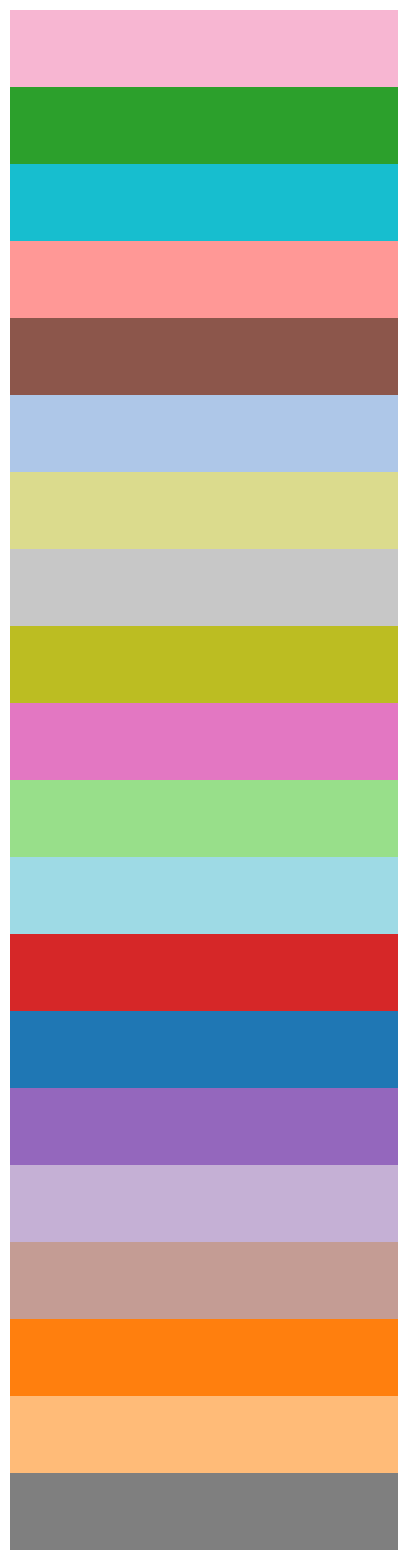

In [2]:
cmap = plt.cm.tab20
colors = [cmap(i) for i in range(20)]
random.shuffle(colors)
          
def display_colors(color_list):
    # Create figure and axes
    fig, ax = plt.subplots(figsize=(5, len(color_list)))

    # Display each color as a rectangle
    for idx, color in enumerate(color_list):
        rect = patches.Rectangle((0, idx), 5, 1, linewidth=1, edgecolor='none', facecolor=color)
        ax.add_patch(rect)

    # Adjust the view
    ax.set_xlim(0, 3)
    ax.set_ylim(0, len(color_list))
    ax.axis('off')  # Hide the axis
    plt.show()
display_colors(colors)

## Problem Description
Given a list of tasts of duration [t_0, ,t_N] and k machined that can perform them assign the tasks to 
the machine so that all the tasts will finish as soon as possible

## Algorithm Description
This problem is hard, but there are greedy approximations that work well within a factor of 4/3

## Generate instances

In [3]:
def generate_instance(N=50,max_length=20):
    ans=[]
    for i in range(50):
        ans.append(random.choice(range(1,max_length)))
    return ans


## Simple greedy algorithm

In [4]:
def simple_greedy(instance,k):
    N=len(instance)
    boxes=dict()
    height=dict()
    frames=[]
    for i in range(k):
        boxes[i]=[]
        height[i]=0
    
    for j in range(N):
        smallest=0
        for l in range(1,k):
            if height[l]<height[smallest]:
                smallest=l
        boxes[smallest].append(instance[j])
        height[smallest]=height[smallest]+instance[j]
        frames.append(list(height.values()).copy())
    return boxes,height,frames
        


In [5]:
instance=generate_instance()

In [7]:
boxes,height,frames=simple_greedy(instance,5)

In [8]:
frames

[[8, 0, 0, 0, 0],
 [8, 5, 0, 0, 0],
 [8, 5, 13, 0, 0],
 [8, 5, 13, 19, 0],
 [8, 5, 13, 19, 7],
 [8, 23, 13, 19, 7],
 [8, 23, 13, 19, 17],
 [10, 23, 13, 19, 17],
 [25, 23, 13, 19, 17],
 [25, 23, 26, 19, 17],
 [25, 23, 26, 19, 19],
 [25, 23, 26, 21, 19],
 [25, 23, 26, 21, 38],
 [25, 23, 26, 31, 38],
 [25, 39, 26, 31, 38],
 [36, 39, 26, 31, 38],
 [36, 39, 41, 31, 38],
 [36, 39, 41, 42, 38],
 [47, 39, 41, 42, 38],
 [47, 39, 41, 42, 52],
 [47, 43, 41, 42, 52],
 [47, 43, 47, 42, 52],
 [47, 43, 47, 61, 52],
 [47, 44, 47, 61, 52],
 [47, 57, 47, 61, 52],
 [57, 57, 47, 61, 52],
 [57, 57, 66, 61, 52],
 [57, 57, 66, 61, 55],
 [57, 57, 66, 61, 65],
 [63, 57, 66, 61, 65],
 [63, 67, 66, 61, 65],
 [63, 67, 66, 75, 65],
 [82, 67, 66, 75, 65],
 [82, 67, 66, 75, 81],
 [82, 67, 85, 75, 81],
 [82, 82, 85, 75, 81],
 [82, 82, 85, 85, 81],
 [82, 82, 85, 85, 89],
 [91, 82, 85, 85, 89],
 [91, 97, 85, 85, 89],
 [91, 97, 104, 85, 89],
 [91, 97, 104, 86, 89],
 [91, 97, 104, 97, 89],
 [91, 97, 104, 97, 106],
 [104,

## Sorted greedy algorithm

In [9]:
def sorted_greedy(instance,k):
    sorted_instance=sorted(instance,reverse=True)
    return simple_greedy(sorted_instance,k)

In [10]:
instance=generate_instance()

In [11]:
instance

[13,
 3,
 2,
 3,
 10,
 5,
 3,
 8,
 17,
 16,
 15,
 13,
 17,
 6,
 7,
 10,
 2,
 18,
 6,
 7,
 7,
 11,
 12,
 14,
 2,
 2,
 8,
 9,
 9,
 11,
 6,
 2,
 4,
 9,
 2,
 5,
 5,
 15,
 7,
 13,
 6,
 13,
 11,
 6,
 19,
 11,
 17,
 4,
 1,
 19]

In [12]:
simple_greedy(instance,5)[1]

{0: 91, 1: 80, 2: 84, 3: 96, 4: 90}

In [13]:
sorted_greedy(instance,5)[1]

{0: 89, 1: 88, 2: 88, 3: 88, 4: 88}

In [144]:
frames

[[19, 0, 0, 0, 0],
 [19, 19, 0, 0, 0],
 [19, 19, 17, 0, 0],
 [19, 19, 17, 17, 0],
 [19, 19, 17, 17, 16],
 [19, 19, 17, 17, 32],
 [19, 19, 33, 17, 32],
 [19, 19, 33, 32, 32],
 [33, 19, 33, 32, 32],
 [33, 33, 33, 32, 32],
 [33, 33, 33, 45, 32],
 [33, 33, 33, 45, 44],
 [45, 33, 33, 45, 44],
 [45, 44, 33, 45, 44],
 [45, 44, 44, 45, 44],
 [45, 55, 44, 45, 44],
 [45, 55, 55, 45, 44],
 [45, 55, 55, 45, 54],
 [55, 55, 55, 45, 54],
 [55, 55, 55, 54, 54],
 [55, 55, 55, 63, 54],
 [55, 55, 55, 63, 63],
 [64, 55, 55, 63, 63],
 [64, 64, 55, 63, 63],
 [64, 64, 63, 63, 63],
 [64, 64, 71, 63, 63],
 [64, 64, 71, 71, 63],
 [64, 64, 71, 71, 71],
 [71, 64, 71, 71, 71],
 [71, 71, 71, 71, 71],
 [78, 71, 71, 71, 71],
 [78, 78, 71, 71, 71],
 [78, 78, 77, 71, 71],
 [78, 78, 77, 76, 71],
 [78, 78, 77, 76, 76],
 [78, 78, 77, 81, 76],
 [78, 78, 77, 81, 81],
 [78, 78, 82, 81, 81],
 [83, 78, 82, 81, 81],
 [83, 82, 82, 81, 81],
 [83, 82, 82, 85, 81],
 [83, 82, 82, 85, 85],
 [83, 86, 82, 85, 85],
 [83, 86, 86, 85, 85]

In [15]:


def animate_load_balancing(frames):
    fig, ax = plt.subplots()
    #assert len(frames[0]) == len(colors), "Number of colors must match the number of bars."

    # Determine the maximum height across all frames
    max_height = max(max(frame) for frame in frames)
    
    # Set the y-axis limit
    ax.set_ylim(0, max_height + 1)  # Adding 1 for a little margin at the top
    # Initial frame
    bars = ax.bar(range(len(frames[0])), frames[0],color=colors)

    def update(frame):
        for bar, height in zip(bars, frame):
            bar.set_height(height)
        return bars

    ani = FuncAnimation(fig, update, frames=frames, repeat=False)
    ani_jshtml = ani.to_jshtml()
    # Display the animation
    return(HTML(ani_jshtml))



In [16]:
instance=generate_instance()

In [17]:
sortedboxes,sortedheights,sortedframes=sorted_greedy(instance,5)
simpleboxes,simpleheights,simpleframes=simple_greedy(instance,5)


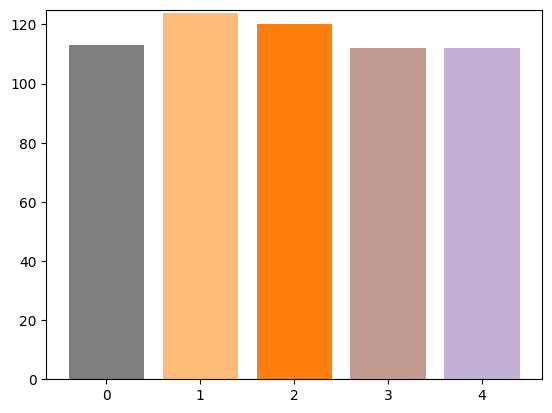

In [18]:
animate_load_balancing(simpleframes)

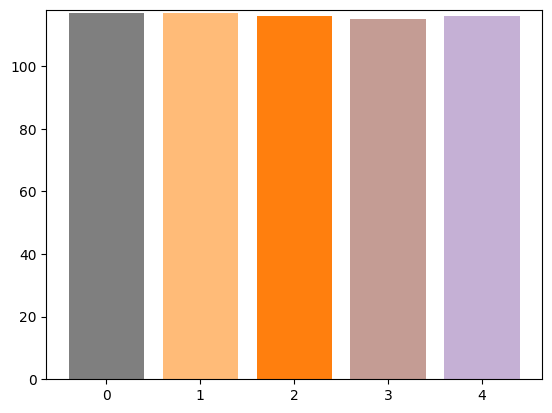

In [19]:
animate_load_balancing(sortedframes)